In [1]:
import sys
import subprocess
import os 

import glob
import multiprocessing

In [2]:
sys.path.append('../../')
from extract_glycan_info import parse_gf_result

Script: Find glycosidic dihedral, average B-factor, and ring shape of glycans from PDB
Author:Rajan Kandel <rajan.kandel@uga.edu>
      *Woods Group, CCRC UGA
  
Currently under development.......
Last Update: Oct 2024

Citations:
1. https://glycam.org/cb/
2. https://glycam.org/portal/gf_home/
 


In [3]:
phi_dihedral=['C2','C1','O6','C6']
psi_dihedral=['C1','O6','C6','C5']

di_sugar=['FCA', 'NAG']
patterns1= ['FCA(*_*_)]-NAG(*_*_)', 'FCA(*_*_)-NAG(*_*_)','FCA(*_*_)]-[*]-NAG(*_*_)', 'FCA(*_*_)-[*]-NAG(*_*_)']
patterns2= ['DFucpa1-6DGlcpNAcb', 'DFucpa1-6]DGlcpNAcb', 'DFucpa1-6[*]DGlcpNAcb']
patterns=(patterns1,patterns2)

gf_result ='../../data_gf_query/a1-6D_GF_results.csv'

chimerax_path= '/bin/chimerax'
bfmp_path = '/home/rajan/apps/BFMP/detect_shape'


instant1 = parse_gf_result(gf_result, phi_dihedral, psi_dihedral, di_sugar, patterns, chimerax_path, bfmp_path)
instant1.read_gf_file()
instant1.dnl_pdbs()
instant1.create_pdb_glycan_dict() 
instant1.glycan_count()
instant1.select_pdbs()

========== Reading_gf_results =====================================
pdbs: ['1A7C', '1ABR', '1ABR', '1AGM', '1AH1', '1AU1', '1AU1', '1AX0', '1AX1', '1AX2', '1AXY', '1AXZ', '1B0F', '1B0F', '1B37', '1B41', '1B5F', '1B5Q', '1BHG', '1BHG', '1BLF', '1BRR', '1BRR', '1BZB', '1C1Z', '1CDR', '1CF5', '1CF5', '1CKL', '1CKL', '1CKL', '1CKL', '1CPO', '1CVI', '1CVI', '1CVI', '1CVI', '1CVN', '1CVN', '1CVN', '1CVN', '1CVU', '1CVU', '1CXP', '1CXP', '1D2V', '1D2V', '1D5L', '1D5L', '1D7W', '1D7W', '1DEO', '1DEX', '1DGL', '1DGL', '1DIY', '1DL2', '1DN2', '1DN2', '1DNU', '1DNU', '1DNW', '1DNW', '1DOG', '1DP5', '1DPJ', '1DWA', '1DWF', '1DWG', '1DWH', '1DWI', '1DWJ', '1DZE', '1E04', '1E05', '1E4K', '1E4K', '1E6Q', '1E6S', '1EOM', '1ETH', '1ETH', '1EX1', '1F6A', '1F6A', '1F6A', '1F6A', '1F8B', '1F8C', '1F8D', '1F8E', '1F8R', '1F8R', '1F8R', '1FC1', '1FC1', '1FC2', '1FE2', '1FE8', '1FE8', '1FE8', '1FI1', '1FRT', '1FRT', '1FUJ', '1FUJ', '1FUJ', '1FUJ', '1FX5', '1FZD', '1FZD', '1FZD', '1FZD', '1G0V', '1G6I', '1G6I

In [4]:
%%capture output
instant1.generate_chimerax_script_to_compute_dihedral()

In [5]:
# Write the entire output to a file
with open('calc_dihedral2.cxc', 'w') as f:
    f.write(output.stdout)

In [6]:
# Use the custom split function
instant1.custom_split_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral_part_')

chimerax script is run parallely in ./calc_dihedral_chimerax
Split into 1 files.


In [7]:
# Run the parallel execution and stitching
instant1.run_chimerax_script_parallel('./calc_dihedral_chimerax/calc_dihedral_part_*.cxc')

Executed 1 ChimeraX scripts in parallel.
Combined outputs into:  combined_chimerax_output.out


In [8]:
# instant1.run_chimerax_script('calc_dihedral2.cxc', 'calc_dihedral2.out')

In [9]:
# torsions = instant1.clean_up_chimerax_output('calc_dihedral2.out')
torsions = instant1.clean_up_chimerax_output('combined_chimerax_output.out')
torsions.to_csv('chimerax_output.csv', index=False)

number of pdb read: 7 
valid torsion1 and torsion2: (7, 7)


In [10]:
instant1.calc_BFactor()

In [11]:
instant1.find_bfmp_ring_shape()

(['3.B', '1.B'], ['4C1', '4C1'])
(['2.F', '1.F'], ['4C1', '4C1'])
(['3.G', '1.G'], ['4C1', '4C1'])
(['3.G', '1.G'], ['4C1', '4C1'])
(['5.A', '1.A'], ['4C1', '4C1'])
(['2.F', '1.F'], ['4C1', '4C1'])
(['3.B', '1.B'], ['4C1', '4C1'])


In [12]:
output_df = instant1.match_glycan_tree()

../../pdbs//5kzx.pdb B FCA 3 C1
../../pdbs//5kzx.pdb B NAG 1 O6
6771 6755
Connection found between 6771 and 6755
../../pdbs//5kzx.pdb F FCA 2 C1
../../pdbs//5kzx.pdb F NAG 1 O6
6890 6888
Connection found between 6890 and 6888
../../pdbs//1j86.pdb G FCA 3 C1
../../pdbs//1j86.pdb G NAG 1 O6
3040 3024
Connection found between 3040 and 3024
../../pdbs//4dwc.pdb G FCA 3 C1
../../pdbs//4dwc.pdb G NAG 1 O6
2816 2800
Connection found between 2816 and 2800
../../pdbs//6db6.pdb A FCA 5 C1
../../pdbs//6db6.pdb A NAG 1 O6
3466 3428
Connection found between 3466 and 3428
../../pdbs//5kzw.pdb F FCA 2 C1
../../pdbs//5kzw.pdb F NAG 1 O6
6890 6888
Connection found between 6890 and 6888
../../pdbs//5kzw.pdb B FCA 3 C1
../../pdbs//5kzw.pdb B NAG 1 O6
6771 6755
Connection found between 6771 and 6755
droped rows: []


In [13]:
output_df.to_csv('DFucpa1-6DGlcpNAcb_ver2.1.csv',sep=',',index=False, columns=['pdb','glycam name','glycan','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])
output_df.to_csv('DFucpa1-6DGlcpNAcb_ver3.csv',sep=',',index=False, columns=['pdb','phi site','psi site','phi','psi','B factor(Avg)','BFMP ring shape'])

In [14]:
################################
# print(instant1.pdbs)
# print(instant1.pdb_glycan_dict)

In [15]:
instant1.torsions

,pdb,phi site,psi site,phi,psi,B factor(Avg),glycan,glycam name,BFMP ring shape
0,5kzx.pdb,B FCA 3 C2 C1 NAG 1 O6 C6,B FCA 3 C1 NAG 1 O6 C6 C5,241.1590,202.8930,"([FCA(3_B_), NAG(1_B_)], [85.73, 41.84])",FCA(3_B_)-[NAG(2_B_)]-NAG(1_B_)-ASN(140_A_),DGlcpNAcb1-4[DFucpa1-6]DGlcpNAcb1-ASN,"([3.B, 1.B], [4C1, 4C1])"
1,5kzx.pdb,F FCA 2 C2 C1 NAG 1 O6 C6,F FCA 2 C1 NAG 1 O6 C6 C5,267.7230,197.8170,"([FCA(2_F_), NAG(1_F_)], [88.57, 53.93])",FCA(2_F_)-NAG(1_F_)-ASN(652_A_),DFucpa1-6DGlcpNAcb1-ASN,"([2.F, 1.F], [4C1, 4C1])"
2,1j86.pdb,G FCA 3 C2 C1 NAG 1 O6 C6,G FCA 3 C1 NAG 1 O6 C6 C5,259.1350,203.8650,"([FCA(3_G_), NAG(1_G_)], [96.24, 75.91])",FCA(3_G_)-[NAG(2_G_)]-NAG(1_G_)-ASN(135_B_),DGlcpNAcb1-4[DFucpa1-6]DGlcpNAcb1-ASN,"([3.G, 1.G], [4C1, 4C1])"
3,4dwc.pdb,G FCA 3 C2 C1 NAG 1 O6 C6,G FCA 3 C1 NAG 1 O6 C6 C5,171.2680,93.5841,"([FCA(3_G_), NAG(1_G_)], [128.2, 81.94])",FCA(3_G_)-[NAG(2_G_)]-NAG(1_G_)-ASN(67_B_),DGlcpNAcb1-4[DFucpa1-6]DGlcpNAcb1-ASN,"([3.G, 1.G], [4C1, 4C1])"
4,6db6.pdb,A FCA 5 C2 C1 NAG 1 O6 C6,A FCA 5 C1 NAG 1 O6 C6 C5,270.8163,266.5013,"([FCA(5_A_), NAG(1_A_)], [52.98, 40.85])",FCA(5_A_)-[MAN(4_A_)-BMA(3_A_)-NAG(2_A_)]-NAG(...,DManpa1-6DManpb1-4DGlcpNAcb1-4[DFucpa1-6]DGlcp...,"([5.A, 1.A], [4C1, 4C1])"
5,5kzw.pdb,F FCA 2 C2 C1 NAG 1 O6 C6,F FCA 2 C1 NAG 1 O6 C6 C5,267.7230,197.8170,"([FCA(2_F_), NAG(1_F_)], [88.57, 53.93])",FCA(2_F_)-NAG(1_F_)-ASN(652_A_),DFucpa1-6DGlcpNAcb1-ASN,"([2.F, 1.F], [4C1, 4C1])"
6,5kzw.pdb,B FCA 3 C2 C1 NAG 1 O6 C6,B FCA 3 C1 NAG 1 O6 C6 C5,241.1590,202.8930,"([FCA(3_B_), NAG(1_B_)], [85.73, 41.84])",FCA(3_B_)-[NAG(2_B_)]-NAG(1_B_)-ASN(140_A_),DGlcpNAcb1-4[DFucpa1-6]DGlcpNAcb1-ASN,"([3.B, 1.B], [4C1, 4C1])"


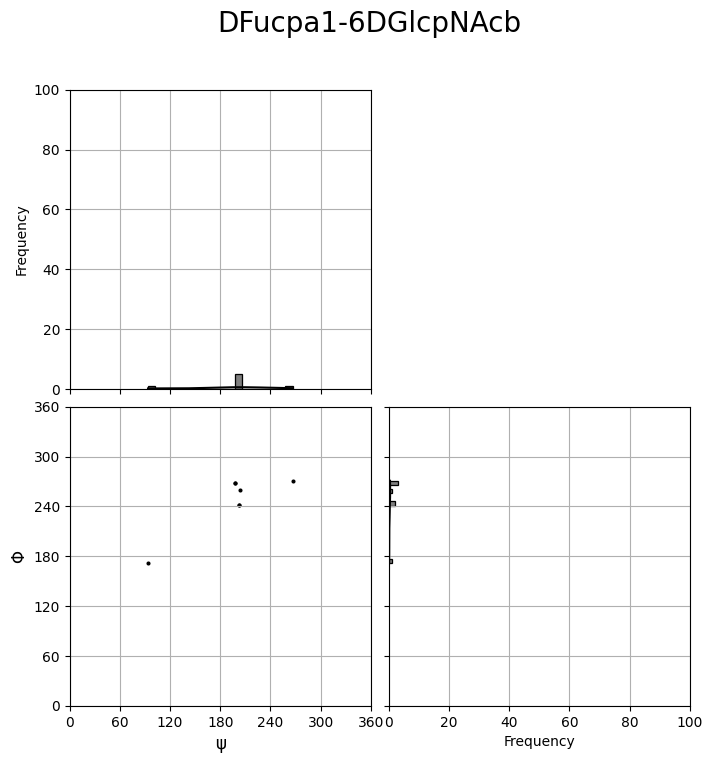

In [16]:
instant1.plot(torsions=instant1.torsions, title='DFucpa1-6DGlcpNAcb',max_histogram_scale=100,step_histogram_tick=20)